## **PCA on Iris Dataset**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
iris = load_iris()
X = iris.data 
y = iris.target  

In [3]:
X.shape

(150, 4)

**Scaling the data**

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

**Covariance Matrix**

In [5]:
cov_matrix = np.cov(X_scaled, rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**Computing Eigenvalues and eigenvectors**

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvalues: ', eigenvalues)
print('Eigenvectors: ', eigenvectors)

Eigenvalues:  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Sorting eigenvalues in descending order**

In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

**Selecting the top two principal components**

In [8]:
top_2_eigenvectors = eigenvectors[:, :2]

**Projecting the data onto the new principal components**

In [9]:
X_pca = X_scaled @ top_2_eigenvectors

**Visualizing  PCA results**

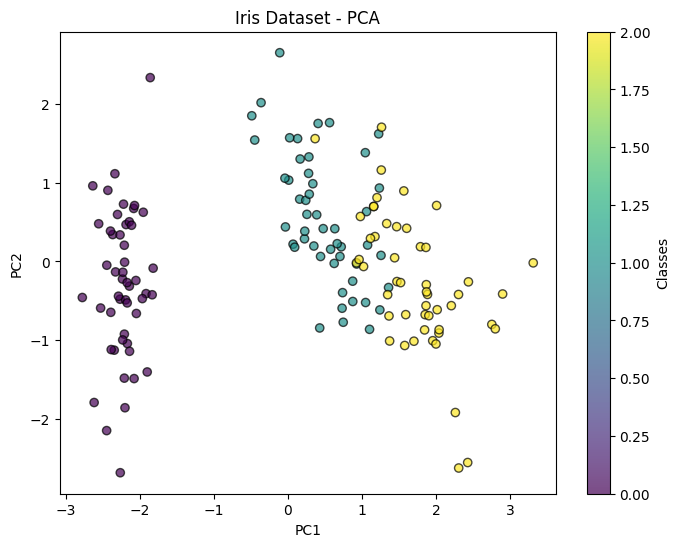

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolors='k', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Dataset - PCA")
plt.colorbar(label="Classes")
plt.show()